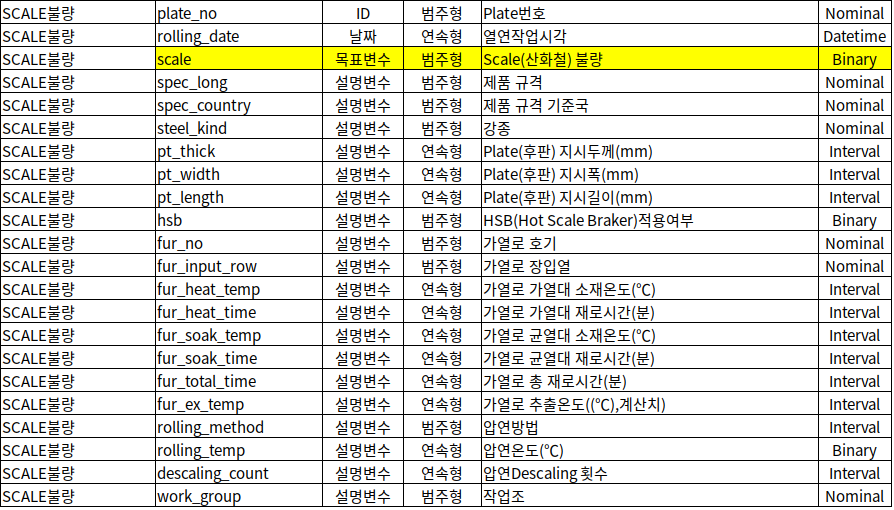

## 문제 상황
* 최근 들어 선박 제조에 주로 사용되는 후판 제품의 "Scale 불량 급증" 이라는 이슈가 발생했다. 그 원인을 분석해 본 결과, 압연흠, Scratch 등 다양한 불량이 발생했으나 특히 압연공정에서 Scale불량이 급증한 것을 확인할 수 있었다. 그래서 수집된 데이터를 활용하여 불량의 근본 원인을 찾고 불량 예측 및 개선 기회를 도출하고자 한다.

### 가설
* 1) 가열로 내에 오래 있을 수록 Scale이 발생할 확률이 올라갈 것이다.
* 2) 강종은 탄소강과 티타늄강이 있는데 탄소강이 티타늄강에 비해 Scale 불량이 날 확률이 높을 것이다. (내부 티타늄 구성 비율음
* 3) HSB(Hot Scale Braker) 처리가 안됐으면, 후판의 표면이 부드럽지 않고 불균일 문제 발생할 수 있음.
* 4) 가열로 총 재로시간이 긴경우 스케일이 발생할 수 있음.
* CR(제어압연),TMCP(온도제어) 경우 CR은 판의 표면 품질과 내부 미세 구조를 향상시키는 데 사용, TMCP은 이는 재료의 인성, 강도, 내구성 등을 향상시키고, 동시에 재료의 변형을 제어
* 5) 압연온도가 높을수록 Scale 발생 확률이 증가하는 경향이 있다.
* 6) 압연 Descaling 횟수 많을 수록 Scale 발생 확률이 감소할 것 같다.
* 7) 후판의 지시두께가 두꺼울수록 Scale 불량 발생 가능성 높아질 수 있음
* 8) 지시폭이 넓을수록 후판 표면에서 열전달과 공기의 접촉이 많아져 Scale 발생 가능성이 높아질 수 있음.
* 9) 후판의 지시길이가 길경우, 후판 표면에서 열전달이 좀더 균일하게 이루어질 수 있으므로, Scale 발생을 줄일 수 있다.판의 표면 온도가 더 균일하게 유지되도록 할 수 있음. 그러나 긴 지시길이는 Scale 불량이 발생할 시간을 늘릴 수 있으며, 이로 인해 Scale이 더 많이 형성될 수 있음.
* 10) 높은 가열대 및 균열대의 소재온도는 후판 표면에서의 산화 속도를 증가시킵니다
* 11) 반면에 너무 낮은 온도는 가열로 공정이 충분히 이루어지지 않아 Scale의 형성을 촉진시킬 수 있습
* 12) 높은 추출온도는 Scale 불량 발생 가능성을 증가시킬 수 있음

In [125]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [126]:
df = pd.read_csv("./SCALE불량.csv",encoding='euc-kr')
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


### 중복된 행 찾기

In [127]:
# 중복된 모든 행 확인하기
duplicates = df[df.duplicated()]

print("중복 데이터 개수:")
print(len(duplicates))

중복 데이터 개수:
0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

In [129]:
df['spec_long'].value_counts() # 제품 종류 66종

JS-SM490YB     84
LR-A           81
LR-AH32        52
AB/A           51
NV-A           48
               ..
LR-AH36         1
BV-AH36-TM      1
A131-DH36TM     1
KR-B            1
KS-HSB600       1
Name: spec_long, Length: 66, dtype: int64

In [130]:
df['spec_country'].value_counts() # 제품 생산국가 7개국

영국     256
일본     187
미국     159
프랑스    143
한국     132
독일      87
공통      36
Name: spec_country, dtype: int64

In [131]:
df['steel_kind'].value_counts() # 강종 종류 2종류

C    755
T    245
Name: steel_kind, dtype: int64

In [132]:
df['pt_thick'].describe()

count    1000.00000
mean       26.78200
std        18.13757
min        12.00000
25%        15.00000
50%        19.00000
75%        34.00000
max       100.00000
Name: pt_thick, dtype: float64

In [133]:
df['hsb'].value_counts() # 제품 생산국가 7개국

적용     953
미적용     47
Name: hsb, dtype: int64

In [134]:
df[df['hsb']=='미적용']

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
94,PLT_1095,03JAN2023:23:05:36,불량,BV-EH36-TM,프랑스,T,74,2700,11000,미적용,...,1142,93,1134,61,235,1134,TMCP(온도제어),847,6,2조
105,PLT_1106,04JAN2023:00:52:01,불량,GL-E36-TM,독일,T,76,2500,9200,미적용,...,1142,82,1131,69,213,1131,TMCP(온도제어),847,6,2조
112,PLT_1113,04JAN2023:02:06:14,불량,AB/EH36-TM,미국,T,83,2600,10400,미적용,...,1124,77,1124,99,250,1124,TMCP(온도제어),846,6,2조
140,PLT_1141,04JAN2023:06:30:39,불량,KR-B,한국,C,16,3100,54300,미적용,...,1148,103,1153,91,288,1153,CR(제어압연),937,10,2조
198,PLT_1199,04JAN2023:16:12:33,불량,V42JBN3,한국,C,32,2200,37400,미적용,...,1166,75,1166,72,251,1166,CR(제어압연),901,8,1조
295,PLT_1296,05JAN2023:07:57:08,불량,JS-SM490YB,일본,C,16,2600,37300,미적용,...,1153,67,1151,44,190,1151,CR(제어압연),976,10,1조
301,PLT_1302,05JAN2023:08:57:07,불량,JS-SM490YB,일본,C,16,2500,37400,미적용,...,1144,56,1150,59,219,1150,CR(제어압연),972,10,1조
309,PLT_1310,05JAN2023:10:16:44,불량,AB/A,미국,C,22,2600,46000,미적용,...,1134,61,1140,55,193,1140,CR(제어압연),972,8,1조
346,PLT_1347,05JAN2023:17:07:38,불량,AB/A,미국,C,25,3400,32500,미적용,...,1137,60,1167,66,212,1167,CR(제어압연),989,8,1조
362,PLT_1363,05JAN2023:20:23:03,불량,AB/B,미국,C,18,3600,34400,미적용,...,1115,57,1160,71,193,1160,CR(제어압연),964,10,2조


* 아이디어 : 'hsb'가 적용이 안된 제품은 모두 불량으로 확인됨.
* 'hsb'가 적용이 되었는데도 불량이 발생한 원인은 뭔지 조사해보자!

In [135]:
df['rolling_method'].value_counts() # 압연방법: 제어압연,온도제어 2종류

CR(제어압연)      840
TMCP(온도제어)    160
Name: rolling_method, dtype: int64

In [136]:
df['descaling_count'].value_counts() # 압연 Descaling(표면 청소) 횟수

10    488
8     249
6     206
9      31
7      20
5       6
Name: descaling_count, dtype: int64

* 재료나 공정에 따라 특정 Descaling 횟수가 정해져 있을 수 있음.

In [137]:
df['work_group'].value_counts() # 작업조 4개조

2조    292
1조    280
3조    218
4조    210
Name: work_group, dtype: int64

### 아이디어1: 강판의 종류에 따라 나눠서 분석해 보자!

* 불량이 많이 발생하는 탄소강 부터 분석을 해보자.

In [138]:
df.corr()

/tmp/ipykernel_30802/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
pt_thick,1.000000,-0.319894,-0.867125,-0.525317,0.206644,-0.665964,0.357260,0.338078,-0.665964,-0.363406,-0.845324
pt_width,-0.319894,1.000000,0.147979,0.200737,-0.100876,0.216879,-0.097273,-0.133329,0.216879,-0.060320,0.350132
pt_length,-0.867125,0.147979,1.000000,0.470846,-0.137895,0.603303,-0.333730,-0.276402,0.603303,0.290828,0.818483
fur_heat_temp,-0.525317,0.200737,0.470846,1.000000,-0.163792,0.787203,-0.373154,-0.313632,0.787203,0.268803,0.488292
fur_heat_time,0.206644,-0.100876,-0.137895,-0.163792,1.000000,-0.349176,0.114804,0.736069,-0.349176,-0.083188,-0.166892
fur_soak_temp,-0.665964,0.216879,0.603303,0.787203,-0.349176,1.000000,-0.596820,-0.560808,1.000000,0.459210,0.627843
fur_soak_time,0.357260,-0.097273,-0.333730,-0.373154,0.114804,-0.596820,1.000000,0.632995,-0.596820,-0.308021,-0.399353
fur_total_time,0.338078,-0.133329,-0.276402,-0.313632,0.736069,-0.560808,0.632995,1.000000,-0.560808,-0.208733,-0.339263
fur_ex_temp,-0.665964,0.216879,0.603303,0.787203,-0.349176,1.000000,-0.596820,-0.560808,1.000000,0.459210,0.627843
rolling_temp,-0.363406,-0.060320,0.290828,0.268803,-0.083188,0.459210,-0.308021,-0.208733,0.459210,1.000000,0.250112


In [139]:
# 목표변수와 연속형 설명변수 관계 확인(히스토그램)
def fun_plot_hist(data, var):
    plt.title(var)
    plt.hist(data[data["scale"] == '양품'][var], label = '양품', alpha = 0.5)
    plt.hist(data[data["scale"] == '불량'][var], label = '불량', alpha = 0.5)
    plt.legend()
    
# 목표변수와 범주형 설명변수 관계 확인(교차표)
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["scale"], columns = data[var]))
    print(pd.crosstab(index = data["scale"], columns = data[var], normalize = 'columns').round(3))

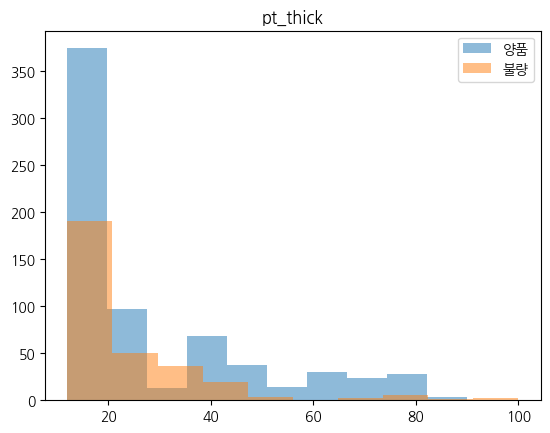

In [140]:
fun_plot_hist(df,'pt_thick')

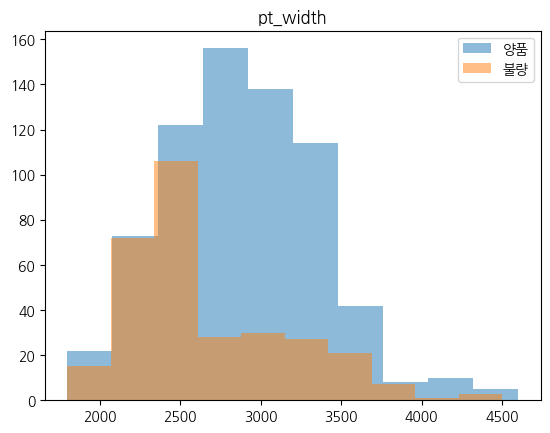

In [141]:
fun_plot_hist(df,'pt_width')

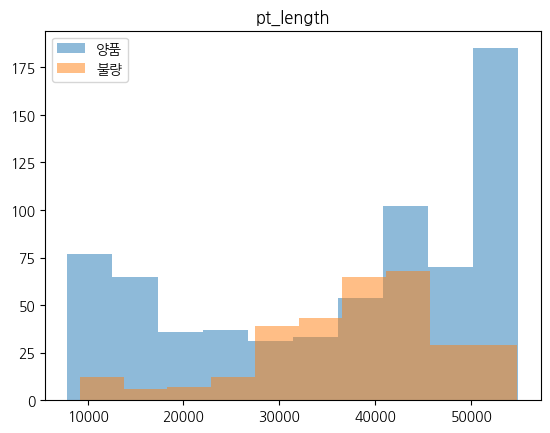

In [142]:
fun_plot_hist(df,'pt_length')

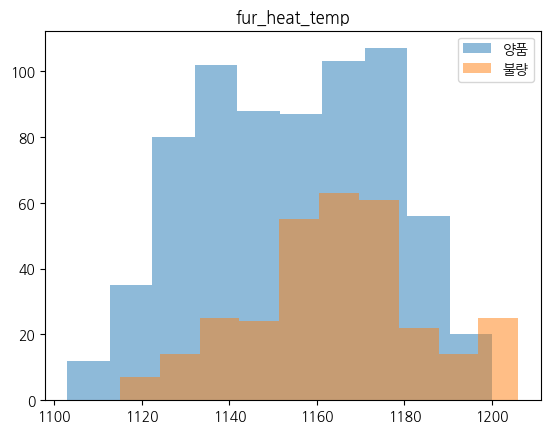

In [143]:
fun_plot_hist(df,'fur_heat_temp')

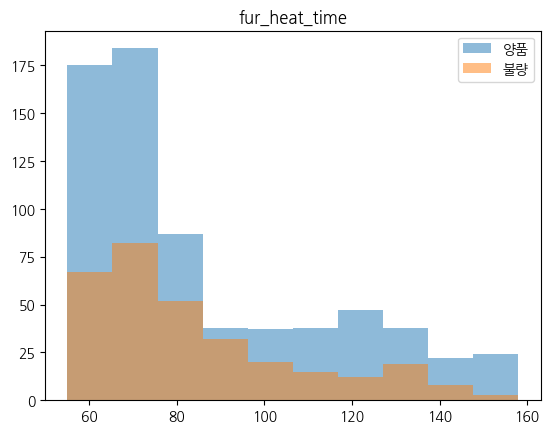

In [144]:
fun_plot_hist(df,'fur_heat_time')

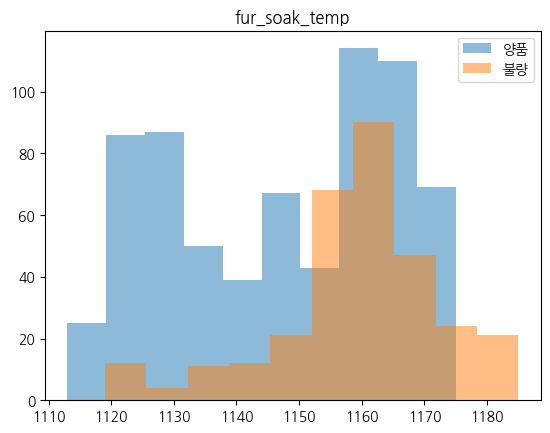

In [145]:
fun_plot_hist(df,'fur_soak_temp') #가열로 균열대 재로시간(분)

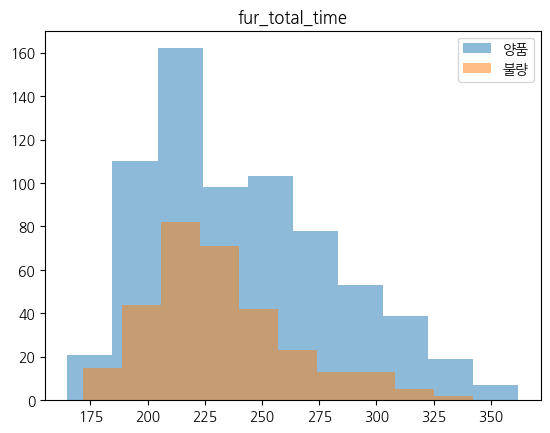

In [146]:
fun_plot_hist(df,'fur_total_time') #가열로 균열대 재로시간(분)

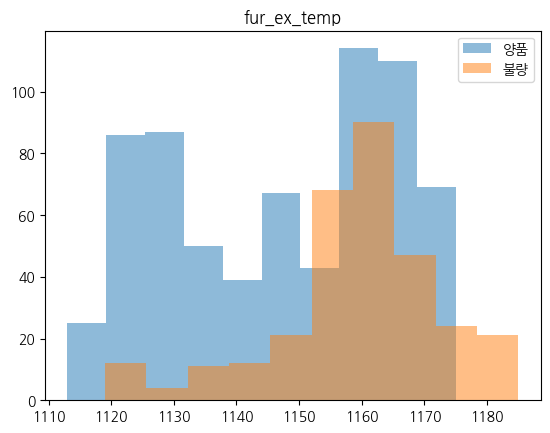

In [147]:
fun_plot_hist(df,'fur_ex_temp') #가열로 균열대 재로시간(분)

In [148]:
df_new = df.copy()

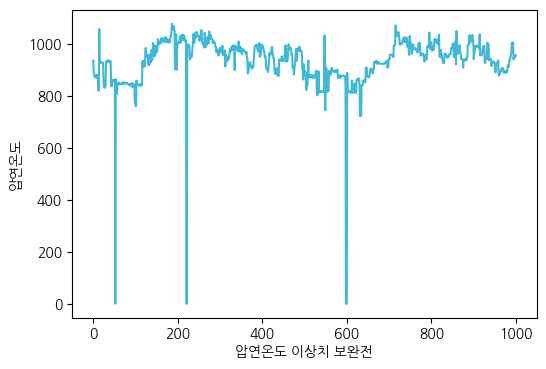

In [149]:
plt.figure(figsize=(6,4))
plt.plot(df_new['rolling_temp'],color='#41B8D5')
plt.xlabel('압연온도 이상치 보완전')
plt.ylabel('압연온도')
plt.show()

In [150]:
df_new[df_new['rolling_temp']>1000]['scale'].value_counts()

불량    188
Name: scale, dtype: int64

In [151]:
for i in df_new.index:
    if df_new.loc[i,'rolling_temp'] == 0 :
        # '양품'인 이전 행의 인덱스를 찾습니다.
        good_indexes = df_new.loc[:i-1][df_new['scale'] == '양품'].index[-2:]
        # 찾은 인덱스를 이용하여 'rolling_temp'의 평균을 계산합니다.
        if len(good_indexes) >= 2: # '양품'인 행이 최소 2개 이상 있는지 확인합니다.
            avg_temp = df_new.loc[good_indexes, 'rolling_temp'].mean()
            df_new.at[i, 'rolling_temp'] = avg_temp
        else:
            # '양품'인 행이 2개 미만인 경우, 다른 처리를 할 수 있습니다. 예를 들어, 0을 유지하거나 다른 로직을 적용할 수 있습니다.
            pass

/tmp/ipykernel_30802/2568137496.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_indexes = df_new.loc[:i-1][df_new['scale'] == '양품'].index[-2:]


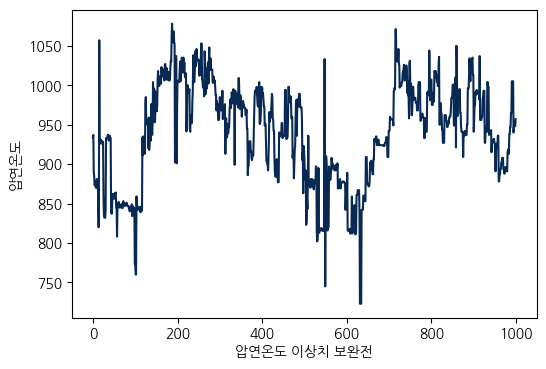

In [152]:
plt.figure(figsize=(6,4))
plt.plot(df_new['rolling_temp'],color='#082953')
plt.xlabel('압연온도 이상치 보완전')
plt.ylabel('압연온도')
plt.show()

In [153]:
df_new[df_new['rolling_temp']>1000]['scale'].value_counts()

불량    188
Name: scale, dtype: int64

In [154]:
# 이상치 변경
df_new.loc[df_new['hsb']== '미적용','descaling_count']=0

In [155]:
df_new[df_new['hsb']== '미적용']['descaling_count'].unique()

array([0])

In [156]:
# 중복되는 fur_ex_temp 열 삭제
df_new.drop('fur_ex_temp', axis=1, inplace=True)
df_new

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,2열,1142,55,1151,86,203,CR(제어압연),948.0,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,2열,1142,55,1151,86,209,CR(제어압연),948.0,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,227,CR(제어압연),948.0,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,204,CR(제어압연),948.0,10,4조


In [157]:
# 'plate_no' 삭제
del df_new['plate_no']

---
## EDA
---

<Axes: xlabel='scale', ylabel='count'>

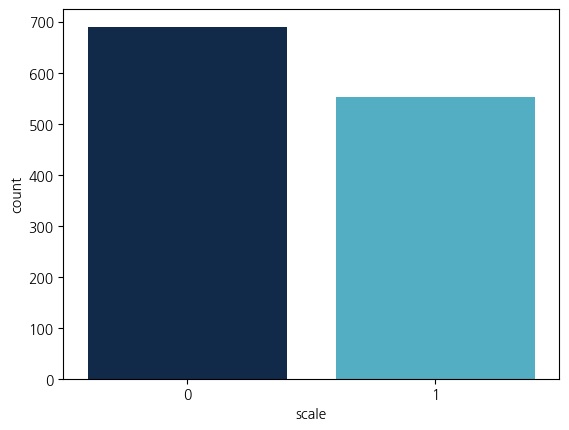

In [331]:
colors = ["#082953", "#41B8D5"]
sns.countplot(x='scale', data=df_new, palette=colors) 

* 양품(0)이 불량(1)보다 두배가량 많다.

<Axes: xlabel='spec_country', ylabel='count'>

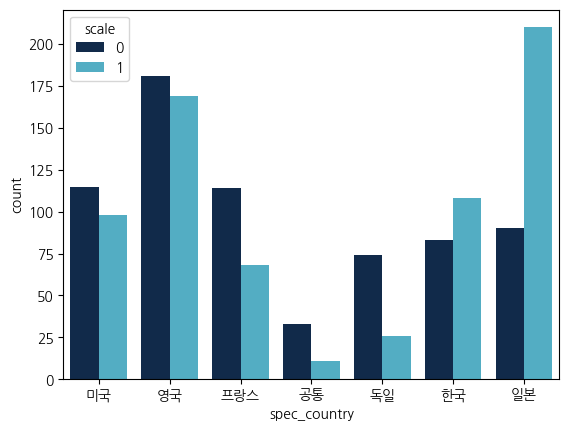

In [332]:
colors = ["#082953", "#41B8D5"]
sns.countplot(x="spec_country", hue="scale", data=df,palette=colors)

* 일본을 제외한 모든 국가에서 양품(0)이 불량(1)보다 높게 나타났다.

<Axes: xlabel='hsb', ylabel='count'>

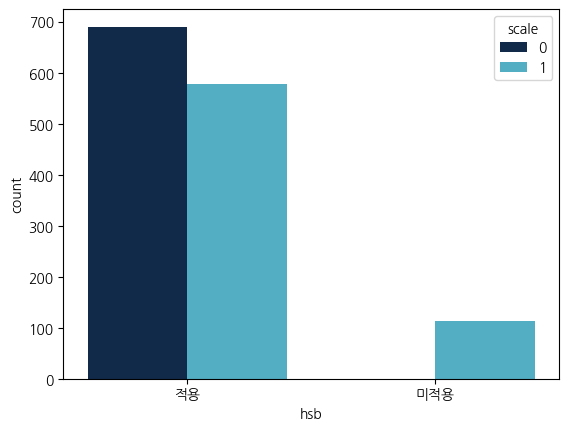

In [333]:
colors = ["#082953", "#41B8D5"]
sns.countplot(x="hsb", hue="scale", data=df,palette=colors)

* hsb를 적용하지 않으면 전부 불량(1)이 나타나고, hsb를 적용한 것 중에 양품(0)의 비율이 높다.

<Axes: xlabel='fur_no', ylabel='count'>

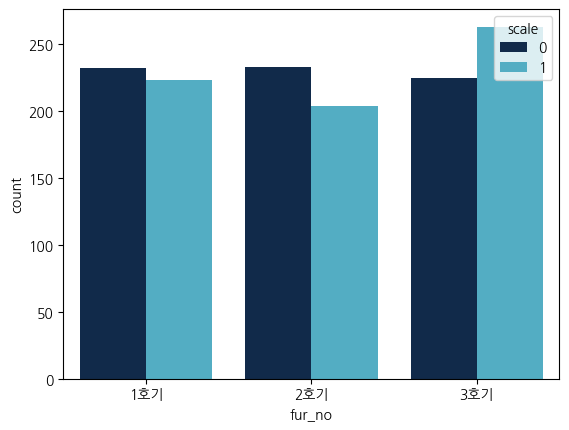

In [334]:
colors = ["#082953", "#41B8D5"]
sns.countplot(x="fur_no", hue="scale", data=df,palette=colors)

* 가열로의 각 호기별로 고르게 양품(0)과 불량(1)의 비율이 나타났다.

<Axes: xlabel='descaling_count', ylabel='count'>

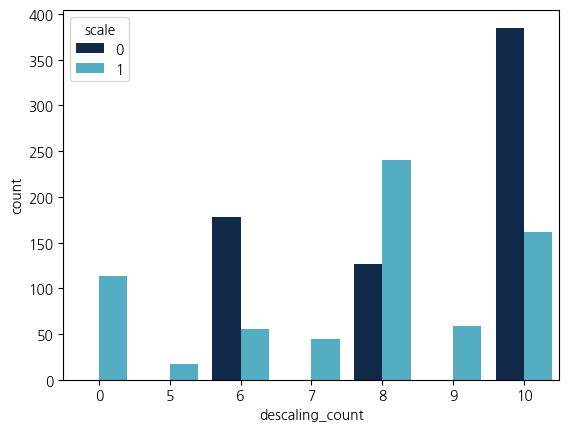

In [335]:
colors = ["#082953", "#41B8D5"]
sns.countplot(x="descaling_count", hue="scale", data=df,palette=colors)

* descaling_count가 짝수일때 양품(0)이 나타났다.

<Axes: xlabel='work_group', ylabel='count'>

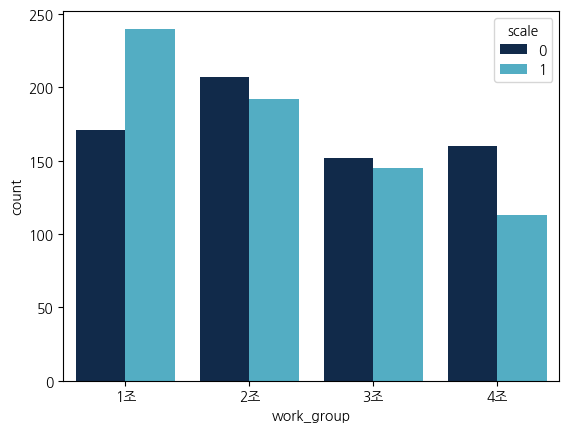

In [336]:
colors = ["#082953", "#41B8D5"]
sns.countplot(x="work_group", hue="scale", data=df,palette=colors)

* work_group이 진행될 수록 불량(1)의 개수가 감소하는 경향을 보인다.

<Axes: xlabel='spec_group', ylabel='count'>

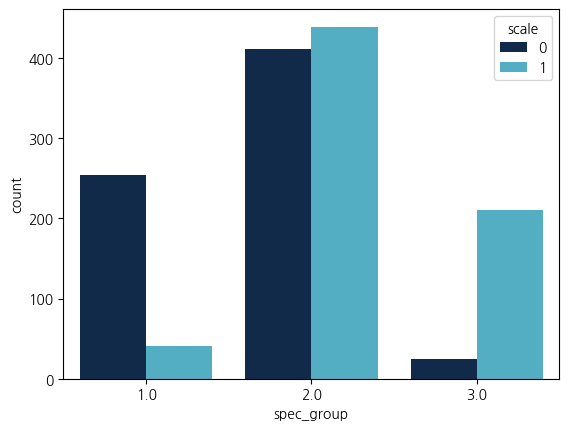

In [337]:
colors = ["#082953", "#41B8D5"]
sns.countplot(x="spec_group", hue="scale", data=df,palette=colors)

* fur_heat_temp에 따라 양품(0)과 불량(1)이 비슷한 경향을 보이지만, 1200도 이상에서는 불량(1)만 보이며 이것이 불량(1)만의 특징으로 볼 수 있다.

/tmp/ipykernel_30802/3986589454.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


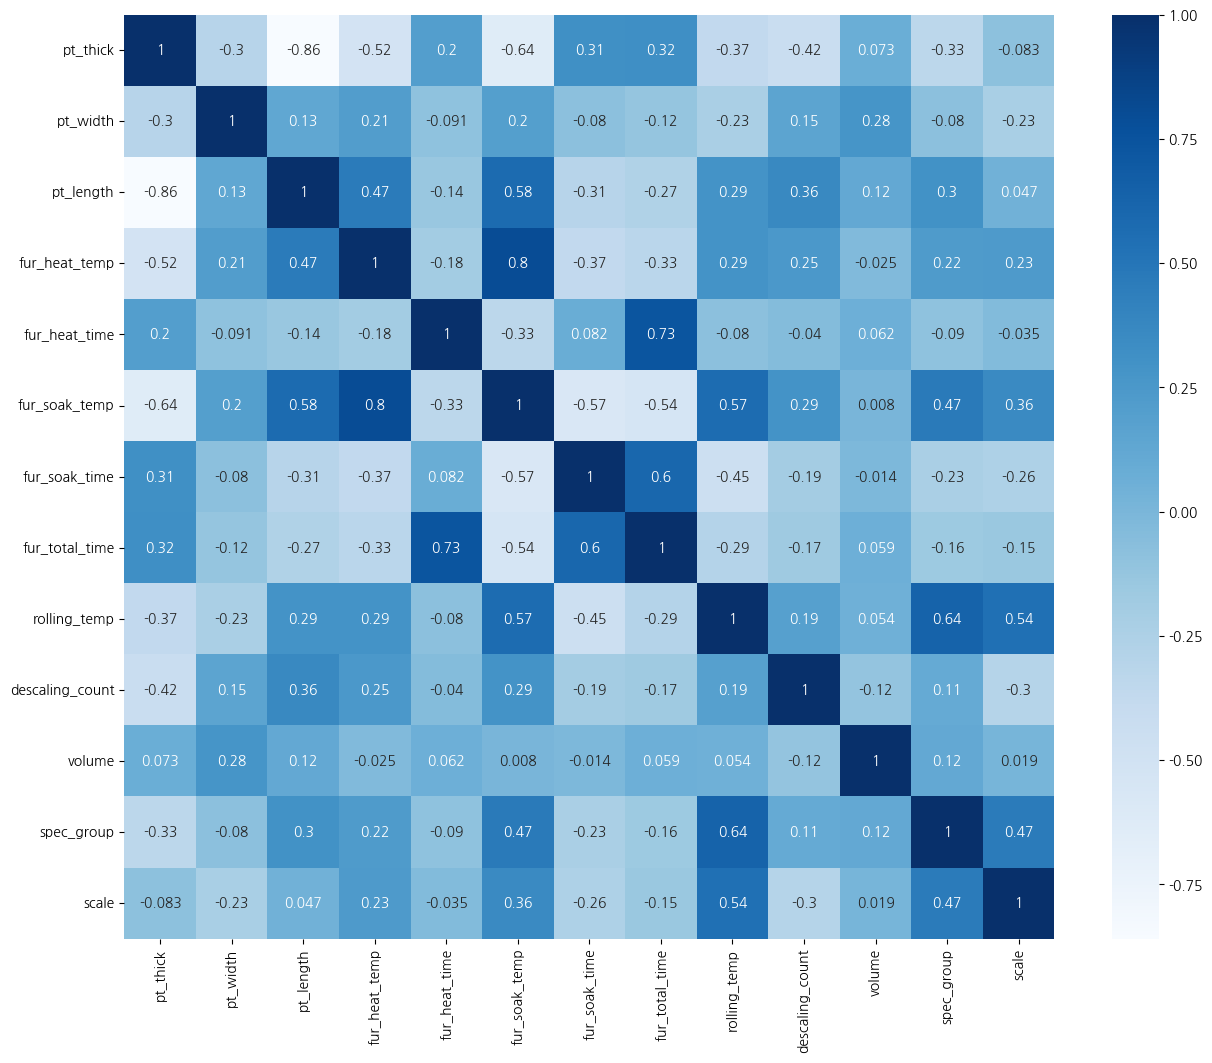

In [340]:
# heatmap으로 상관분석
df_corr = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(df_corr, annot=True, cmap="Blues")
plt.show()

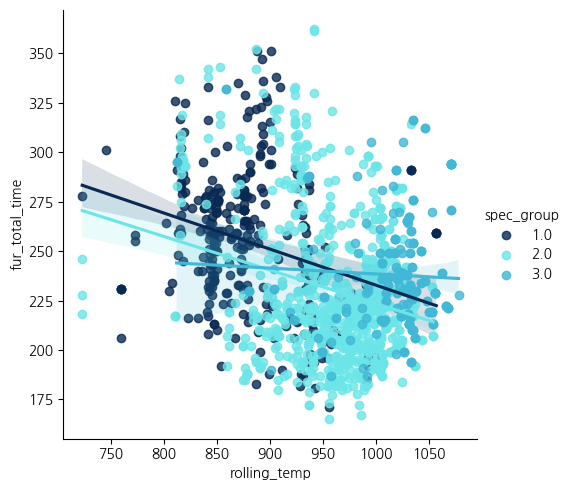

In [341]:
colors = ['#082953', '#6CE5E8', '#41B8D5']
sns.lmplot(data=df, x = "rolling_temp", y = "fur_total_time", hue="spec_group", palette=colors)

* 압연온도가 증가함에 따라 가열로 총 재로시간이 대체로 증가하는 경향을 보였다.

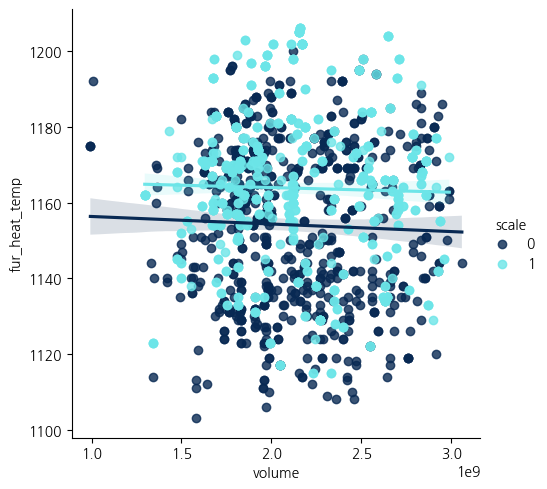

In [342]:
colors = ['#082953', '#6CE5E8', '#41B8D5']
sns.lmplot(data=df, x = "volume", y = "fur_heat_temp", hue="scale", palette=colors)

* 부피와 가열로 소재온도 사이에는 약한 음의 상관관계가 있다. 이는 부피가 증가함에 따라 가열로 소재온도에 큰 변화가 없다는 의미이다. 
가열로 소재온도가 높아질수록 불량(1)이 증가하는 경향을 보인다.

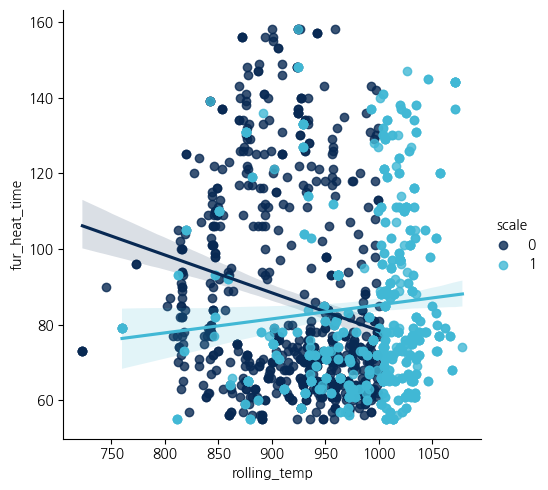

In [343]:
colors = ["#082953", "#41B8D5"]
sns.lmplot(data=df, x = "rolling_temp", y = "fur_heat_time", hue="scale", palette=colors)

* 압연온도가 증가함에 따라 가열로 가열대 소재온도가 증가하는 경향이 있다.
특히 불량(1)에서 가열대 소재온도의 증가가 더 두드러지게 보인다. 

## 데이터셋 분리

In [158]:
# 탄소강, 티타늄강 데이터 나누기
df_new[df_new['steel_kind']=='T'].to_csv('종합실습2_티타늄강.csv',index=False)
df_new[df_new['steel_kind']=='C'].to_csv('종합실습2_탄소강.csv',index=False)

In [162]:
# 오버샘플링을 위한 기본 데이터 복사
df_oversample = df_new.copy()

In [163]:
# 파생변수'volume' 부피 생성
df_new['volume'] = df_new['pt_thick']*df_new['pt_width']*df_new['pt_length']

In [164]:
spec_long = df_new['spec_long'].unique().tolist()
for spec in spec_long:
    normal_ratio = len(df_new[(df_new['spec_long']==spec) & (df_new['scale']=='양품')]) / len(df_new[df_new['spec_long']==spec])
    abnormal_ratio = len(df_new[(df_new['spec_long']==spec) & (df_new['scale']=='불량')]) / len(df_new[df_new['spec_long']==spec])
    percent = normal_ratio - abnormal_ratio
    print(spec)
    print("normal: ",normal_ratio)
    print("abnormal: ",abnormal_ratio)
    print("")
    if percent > 0.4:
        df_new.loc[df_new['spec_long']==spec, 'spec_group'] = 1
    elif percent > -0.4 :
        df_new.loc[df_new['spec_long']==spec, 'spec_group'] = 2
    else:
        df_new.loc[df_new['spec_long']==spec, 'spec_group'] = 3

AB/EH32-TM
normal:  1.0
abnormal:  0.0

NV-E36-TM
normal:  1.0
abnormal:  0.0

BV-EH36-TM
normal:  0.9487179487179487
abnormal:  0.05128205128205128

AB/EH36-TM
normal:  0.9375
abnormal:  0.0625

COMMON
normal:  0.9166666666666666
abnormal:  0.08333333333333333

BV-AH32-TM
normal:  1.0
abnormal:  0.0

GL-E32-TM
normal:  0.8333333333333334
abnormal:  0.16666666666666666

GL-E36-TM
normal:  0.9375
abnormal:  0.0625

BV-EH32-TM
normal:  1.0
abnormal:  0.0

KS-HSB600
normal:  1.0
abnormal:  0.0

LR-EH36-TM
normal:  1.0
abnormal:  0.0

BV-B
normal:  0.7058823529411765
abnormal:  0.29411764705882354

AB/B
normal:  0.6666666666666666
abnormal:  0.3333333333333333

LR-B
normal:  0.5384615384615384
abnormal:  0.46153846153846156

JS-SM490YB
normal:  0.5833333333333334
abnormal:  0.4166666666666667

KR-B
normal:  0.0
abnormal:  1.0

LR-A
normal:  0.691358024691358
abnormal:  0.30864197530864196

JS-SM490A
normal:  0.18181818181818182
abnormal:  0.8181818181818182

KS-SM400B
normal:  0.5
abnormal

In [165]:
df_new['spec_group'] = df_new['spec_group'].astype(int)

In [166]:
del df_new['spec_long']
del df_new['rolling_date']

In [167]:
df_new['scale'] = df_new['scale'].map({'양품':0,'불량':1})
df_oversample['scale'] = df_oversample['scale'].map({'양품':0,'불량':1})

---
## 오버 샘플링 데이터 생성
---

In [169]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# over sampling 전 목표변수 분포 확인
print(df_oversample['scale'].value_counts())
print("[비율] 양품:불량품\n {0:.1f}:{1:.1f}".format(len(df_oversample[df_oversample['scale'] == 0]) / len(df_oversample['scale']), len(df_oversample[df_oversample['scale'] == 1]) / len(df_oversample['scale'])) )

0    690
1    310
Name: scale, dtype: int64
[비율] 양품:불량품
 0.7:0.3


In [171]:
# over sampling models & ratios
models = ['ros', 'smote']
ratio = [1.0, 0.8]
var = ["o", "x"]

for m in models:
    for r in ratio:
        for v in var:
            if m == "ros":
                model = RandomOverSampler(sampling_strategy = r, random_state = 1234)
            elif model == "smote":
                m = SMOTE(sampling_strategy = r, random_state = 1234)
            
            X, y = df_oversample.drop(['scale'], axis = 1), df_oversample['scale']
                
            x_resampled, y_resampled = model.fit_resample(X, y)
            over_df = pd.concat([x_resampled, pd.DataFrame(y_resampled)], axis = 1)
            
            
            if v == "o":
                ## 파생변수 코드
                # spec_group
                spec_long = over_df['spec_long'].unique().tolist()
                for spec in spec_long:
                    normal_ratio = len(over_df[(over_df['spec_long']==spec) & (over_df['scale']== 0)]) / len(over_df[over_df['spec_long']== spec])
                    abnormal_ratio = len(over_df[(over_df['spec_long']==spec) & (over_df['scale']== 1)]) / len(over_df[over_df['spec_long']== spec])
                    percent = normal_ratio - abnormal_ratio
                    
                    if percent > 0.4:
                        over_df.loc[over_df['spec_long']==spec, 'spec_group'] = 1
                    elif percent > -0.4 :
                        over_df.loc[over_df['spec_long']==spec, 'spec_group'] = 2
                    else:
                        over_df.loc[over_df['spec_long']==spec, 'spec_group'] = 3
                # volume
                over_df['volume'] = over_df['pt_thick']*over_df['pt_width']*over_df['pt_length']
                file_name = "종합실습2_" + m + str(r).replace('.', '') + "_" + v + ".csv"
                
                    
            
            file_name = "종합실습2_" + m + str(r).replace('.', '') + "_" + v + ".csv"
            over_df.to_csv(file_name, index = False) 

In [173]:
# Oversampling 후

df = pd.read_csv("종합실습2_ros10_o.csv")
print(df['scale'].value_counts())
print("[비율] 양품:불량품\n {0:.1f}:{1:.1f}".format(len(df[df['scale'] == 0]) / len(df['scale']), len(df[df['scale'] == 1]) / len(df['scale'])) )

0    690
1    690
Name: scale, dtype: int64
[비율] 양품:불량품
 0.5:0.5


---
## 모델링
---
* 아래는 파생변수 + 오버샘플링 데이터셋을 활용한 모델 생성 및 결과 이다.

In [292]:
df_new = pd.read_csv('종합실습2_smote10_o.csv')
del df_new['rolling_date']
del df_new['spec_long']
df_new.head()

,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,volume,spec_group,scale
0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,1787840000,1.0,0
1,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,1787840000,1.0,0
2,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,2280960000,1.0,0
3,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,2280960000,1.0,0
4,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,1566740000,1.0,0


## 1. Logistic Regression

In [293]:
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [294]:
# 명목형 변수 목록
obj_cols = df_new.select_dtypes("object").columns

for col in obj_cols:
    _n = len(df_new[col].value_counts())
    print(col, ":", str(_n))

spec_country : 7
steel_kind : 2
hsb : 2
fur_no : 3
fur_input_row : 2
rolling_method : 2
work_group : 4


In [295]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_new, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (869, 20)
test data size : (373, 20)


In [296]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("""scale ~ C(spec_country) + pt_thick + pt_width + pt_length + C(hsb) + C(fur_no) + C(fur_input_row) + 
                    fur_heat_temp + fur_heat_time + fur_soak_temp + fur_soak_time + fur_total_time +
                    C(rolling_method) + rolling_temp + descaling_count + C(work_group) + volume + spec_group""", df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.320399
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  869
Model:                          Logit   Df Residuals:                      842
Method:                           MLE   Df Model:                           26
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5324
Time:                        10:28:55   Log-Likelihood:                -278.43
converged:                      False   LL-Null:                       -595.49
Covariance Type:            nonrobust   LLR p-value:                4.478e-117
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -99.9563     82.025     -1.219      0.223    -260.722      60.809
C(

/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [297]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("""scale ~ fur_heat_temp  + rolling_temp +
                    descaling_count + spec_group""", df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.354694
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  869
Model:                          Logit   Df Residuals:                      864
Method:                           MLE   Df Model:                            4
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4824
Time:                        10:28:59   Log-Likelihood:                -308.23
converged:                       True   LL-Null:                       -595.49
Covariance Type:            nonrobust   LLR p-value:                5.054e-123
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -73.0965      7.466     -9.790      0.000     -87.730     -58.463
fur_heat_temp 

In [298]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)  # 0.5 : “1/0” 판정 임계값(1 발생 확률) 변경 가능 
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["scale"],y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["scale"],y_pred_test_class)),"\n")

Train 예측 결과 
 685    0
322    0
585    0
497    0
988    0
dtype: int64 

Confusion Matrix: 
[[425  64]
 [ 71 309]] 

Test 예측 결과 
 232     0
329     1
1147    1
602     0
412     0
dtype: int64 

Confusion Matrix: 
[[175  26]
 [ 16 156]] 



### 분류 기준(임계값) 0.6일 때 TEST정확도가 더 높다(SHIT)

In [299]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["scale"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["scale"],y_pred_train_class)),"\n")
print(classification_report(df_train["scale"], y_pred_train_class, target_names=['양품', '불량'], digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["scale"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["scale"],y_pred_test_class)),"\n")
print(classification_report(df_test["scale"], y_pred_test_class, target_names=['양품', '불량'], digits=3))

Train 예측/분류 결과
Accuracy: 0.845

Confusion Matrix: 
[[425  64]
 [ 71 309]] 

              precision    recall  f1-score   support

          양품      0.857     0.869     0.863       489
          불량      0.828     0.813     0.821       380

    accuracy                          0.845       869
   macro avg      0.843     0.841     0.842       869
weighted avg      0.844     0.845     0.844       869

Test 예측/분류 결과
Accuracy: 0.887

Confusion Matrix: 
[[175  26]
 [ 16 156]] 

              precision    recall  f1-score   support

          양품      0.916     0.871     0.893       201
          불량      0.857     0.907     0.881       172

    accuracy                          0.887       373
   macro avg      0.887     0.889     0.887       373
weighted avg      0.889     0.887     0.888       373



## 2. Decision_Tree

In [300]:
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [301]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_new)
df_raw_dummy.head()

# 데이터 분리:설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop("scale", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["scale"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (1242, 34)
분할 후 설명변수 데이터 :Train (869, 34)   Test (373, 34)


In [302]:
# DT 최적 파라미터 추출(Depth,MinSamplesSplit,min_samples_leaf )
tree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=10, min_samples_leaf=15, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, min_samples_split=10,
                       random_state=1234)

In [303]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Test Accuracy: 0.960

Test Confusion matrix: 
[[201   0]
 [ 15 157]]
              precision    recall  f1-score   support

           0      0.931     1.000     0.964       201
           1      1.000     0.913     0.954       172

    accuracy                          0.960       373
   macro avg      0.965     0.956     0.959       373
weighted avg      0.963     0.960     0.960       373



In [304]:
# 변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3).head()

,Feature,Importance
8,rolling_temp,0.537
9,descaling_count,0.247
5,fur_soak_temp,0.216
27,fur_input_row_2열,0.000
21,hsb_미적용,0.000


Text(0, 0.5, '설명변수')

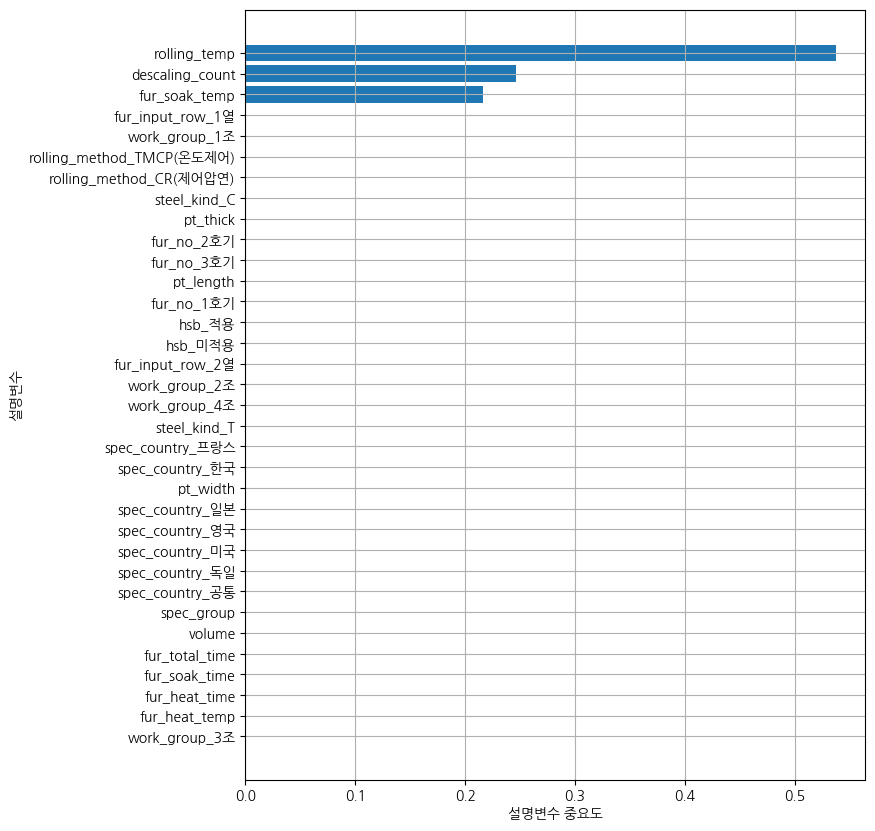

In [305]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))

plt.figure(figsize=(8,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.grid()
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## 3. Gradient Boosting

In [306]:
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [307]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_new)

In [308]:
# 데이터 분리:설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop("scale", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["scale"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (1242, 34)
분할 후 설명변수 데이터 :Train (869, 34)   Test (373, 34)


In [309]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [310]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=20, min_samples_split=520, max_depth=4, n_estimators=90, learning_rate=0.28, 
                                      random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 1.000
Test Accuracy: 1.000

Test Confusion matrix: 
[[201   0]
 [  0 172]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       201
           1      1.000     1.000     1.000       172

    accuracy                          1.000       373
   macro avg      1.000     1.000     1.000       373
weighted avg      1.000     1.000     1.000       373



## 4. Random Forest

In [311]:
from sklearn.ensemble import RandomForestClassifier

# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_new)

In [312]:
# 데이터 분리:설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop("scale", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["scale"] 

# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (1242, 34)
분할 후 설명변수 데이터 :Train (869, 34)   Test (373, 34)


In [313]:
# 랜덤 포레스트 모델 생성: RandomForestClassifier
rf_uncust = RandomForestClassifier(random_state=1234)
rf_uncust.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.984


In [314]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf=5, max_depth=8, n_estimators=80,
                                  random_state=1234)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.972
Accuracy on test set: 0.954

Confusion matrix: 
[[200   1]
 [ 16 156]]
              precision    recall  f1-score   support

           0      0.926     0.995     0.959       201
           1      0.994     0.907     0.948       172

    accuracy                          0.954       373
   macro avg      0.960     0.951     0.954       373
weighted avg      0.957     0.954     0.954       373



In [315]:
# 변수명
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3).head(5)

,Feature,Importance
8,rolling_temp,0.262
9,descaling_count,0.121
5,fur_soak_temp,0.100
1,pt_width,0.077
0,pt_thick,0.056


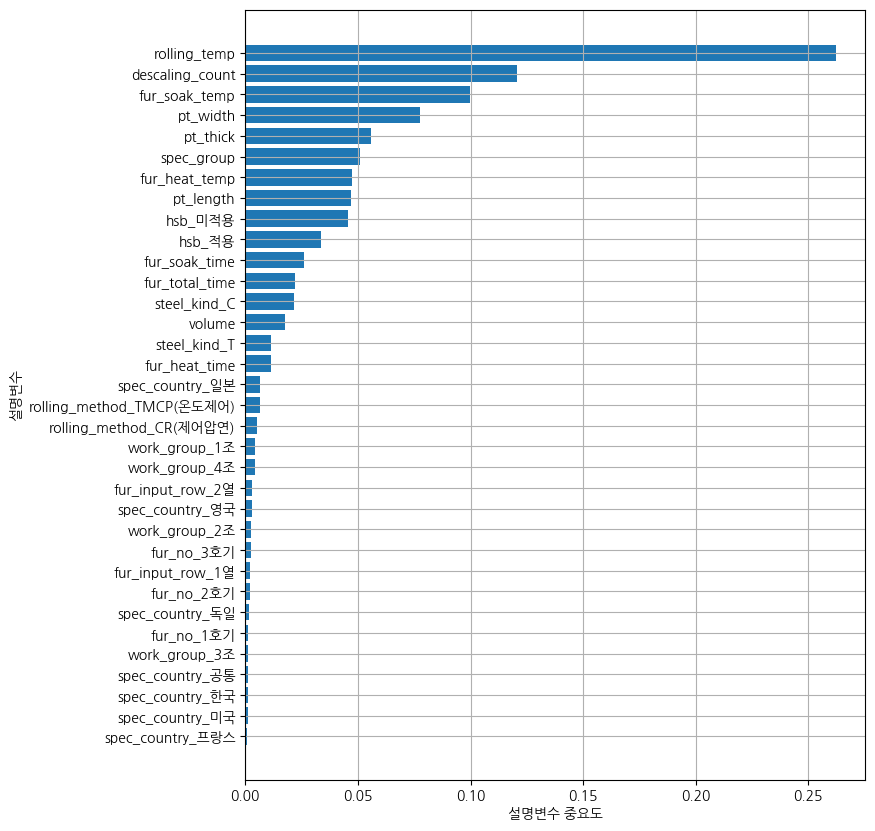

In [316]:
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.figure(figsize=(8,10))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")
plt.grid()

## 5. Suport Vector Machine

In [317]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 데이터 분리:설명변수, 목표변수 구분
df_raw_x = df_new.drop("scale", axis = 1, inplace = False)
df_raw_y = df_new["scale"] 

In [318]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,spec_country,steel_kind,hsb,fur_no,fur_input_row,rolling_method,work_group
0,미국,T,적용,1호기,1열,TMCP(온도제어),1조
1,미국,T,적용,1호기,2열,TMCP(온도제어),1조
2,영국,T,적용,2호기,1열,TMCP(온도제어),1조
3,영국,T,적용,2호기,2열,TMCP(온도제어),1조
4,프랑스,T,적용,3호기,1열,TMCP(온도제어),1조


'Dummy 변환 후:'

,spec_country_공통,spec_country_독일,spec_country_미국,spec_country_영국,spec_country_일본,spec_country_프랑스,spec_country_한국,steel_kind_C,steel_kind_T,hsb_미적용,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,1,1,0,0,0


In [319]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,volume,spec_group
0,32,3700,15100,1144,116,1133,59,259,934.0,8,1787840000,1.0
1,32,3700,15100,1144,122,1135,53,238,937.0,8,1787840000,1.0
2,33,3600,19200,1129,116,1121,55,258,889.0,8,2280960000,1.0
3,33,3600,19200,1152,125,1127,68,266,885.0,8,2280960000,1.0
4,38,3100,13300,1140,134,1128,48,246,873.0,8,1566740000,1.0


'Scale 변환 후:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,volume,spec_group
0,0.313309,1.813734,-1.636879,-0.681495,1.174259,-1.147120,-0.557741,0.598306,-0.238547,0.049908,-0.887998,-1.50486
1,0.313309,1.813734,-1.636879,-0.681495,1.406759,-1.029641,-0.856948,0.024698,-0.192453,0.049908,-0.887998,-1.50486
2,0.369992,1.612658,-1.329598,-1.385824,1.174259,-1.851992,-0.757212,0.570992,-0.929954,0.049908,0.410577,-1.50486
3,0.369992,1.612658,-1.329598,-0.305852,1.523008,-1.499556,-0.108930,0.789509,-0.991412,0.049908,0.410577,-1.50486
4,0.653408,0.607276,-1.771782,-0.869316,1.871758,-1.440817,-1.106287,0.243215,-1.175788,0.049908,-1.470239,-1.50486


In [320]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,volume,spec_group
0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,1787840000,1.0
1,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,1787840000,1.0
2,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,2280960000,1.0
3,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,2280960000,1.0
4,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,1566740000,1.0


'Scale/Dummy 변환 후:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,0.313309,1.813734,-1.636879,-0.681495,1.174259,-1.147120,-0.557741,0.598306,-0.238547,0.049908,...,0,0,1,0,0,1,1,0,0,0
1,0.313309,1.813734,-1.636879,-0.681495,1.406759,-1.029641,-0.856948,0.024698,-0.192453,0.049908,...,0,0,0,1,0,1,1,0,0,0
2,0.369992,1.612658,-1.329598,-1.385824,1.174259,-1.851992,-0.757212,0.570992,-0.929954,0.049908,...,1,0,1,0,0,1,1,0,0,0
3,0.369992,1.612658,-1.329598,-0.305852,1.523008,-1.499556,-0.108930,0.789509,-0.991412,0.049908,...,1,0,0,1,0,1,1,0,0,0
4,0.653408,0.607276,-1.771782,-0.869316,1.871758,-1.440817,-1.106287,0.243215,-1.175788,0.049908,...,0,1,1,0,0,1,1,0,0,0


In [321]:
# 변환된 설명변수 데이터 사용:df_x_converted 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (869, 34)
분할된 Test Data: (373, 34)


In [322]:
svm_uncust = SVC(random_state=1234)
svm_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy : {:.3f}".format(svm_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}".format(svm_uncust.score(df_test_x, df_test_y)))

Train Accuracy : 0.908
Test Accuracy : 0.906


In [323]:
# 최종 모델
svc_final = SVC(gamma=0.1, C=2.8, random_state=1234)
svc_final.fit(df_train_x, df_train_y)

# 평가
y_pred = svc_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 0.967
Test Accuracy : 0.930

Test Confusion matrix: 
[[191  10]
 [ 16 156]]
              precision    recall  f1-score   support

           0      0.923     0.950     0.936       201
           1      0.940     0.907     0.923       172

    accuracy                          0.930       373
   macro avg      0.931     0.929     0.930       373
weighted avg      0.931     0.930     0.930       373



## 6. Neural Network

In [324]:
from sklearn.neural_network import MLPClassifier

# 데이터 분리:설명변수, 목표변수 구분
df_raw_x = df_new.drop("scale", axis = 1, inplace = False)
df_raw_y = df_new["scale"] 

# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (1242, 19)
분할 후 설명변수 데이터 :Train (869, 19)   Test (373, 19)


In [325]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,volume,spec_group
0,32,3700,15100,1144,116,1133,59,259,934.0,8,1787840000,1.0
1,32,3700,15100,1144,122,1135,53,238,937.0,8,1787840000,1.0
2,33,3600,19200,1129,116,1121,55,258,889.0,8,2280960000,1.0
3,33,3600,19200,1152,125,1127,68,266,885.0,8,2280960000,1.0
4,38,3100,13300,1140,134,1128,48,246,873.0,8,1566740000,1.0


'Scale 변환 후:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,volume,spec_group
0,0.313309,1.813734,-1.636879,-0.681495,1.174259,-1.147120,-0.557741,0.598306,-0.238547,0.049908,-0.887998,-1.50486
1,0.313309,1.813734,-1.636879,-0.681495,1.406759,-1.029641,-0.856948,0.024698,-0.192453,0.049908,-0.887998,-1.50486
2,0.369992,1.612658,-1.329598,-1.385824,1.174259,-1.851992,-0.757212,0.570992,-0.929954,0.049908,0.410577,-1.50486
3,0.369992,1.612658,-1.329598,-0.305852,1.523008,-1.499556,-0.108930,0.789509,-0.991412,0.049908,0.410577,-1.50486
4,0.653408,0.607276,-1.771782,-0.869316,1.871758,-1.440817,-1.106287,0.243215,-1.175788,0.049908,-1.470239,-1.50486


In [326]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,spec_country,steel_kind,hsb,fur_no,fur_input_row,rolling_method,work_group
0,미국,T,적용,1호기,1열,TMCP(온도제어),1조
1,미국,T,적용,1호기,2열,TMCP(온도제어),1조
2,영국,T,적용,2호기,1열,TMCP(온도제어),1조
3,영국,T,적용,2호기,2열,TMCP(온도제어),1조
4,프랑스,T,적용,3호기,1열,TMCP(온도제어),1조


'Dummy 변환 후:'

,spec_country_공통,spec_country_독일,spec_country_미국,spec_country_영국,spec_country_일본,spec_country_프랑스,spec_country_한국,steel_kind_C,steel_kind_T,hsb_미적용,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,1,1,0,0,0


In [327]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,volume,spec_group
0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934.0,8,1조,1787840000,1.0
1,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937.0,8,1조,1787840000,1.0
2,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889.0,8,1조,2280960000,1.0
3,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885.0,8,1조,2280960000,1.0
4,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873.0,8,1조,1566740000,1.0


'Scale/Dummy 변환 후:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,fur_no_2호기,fur_no_3호기,fur_input_row_1열,fur_input_row_2열,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,0.313309,1.813734,-1.636879,-0.681495,1.174259,-1.147120,-0.557741,0.598306,-0.238547,0.049908,...,0,0,1,0,0,1,1,0,0,0
1,0.313309,1.813734,-1.636879,-0.681495,1.406759,-1.029641,-0.856948,0.024698,-0.192453,0.049908,...,0,0,0,1,0,1,1,0,0,0
2,0.369992,1.612658,-1.329598,-1.385824,1.174259,-1.851992,-0.757212,0.570992,-0.929954,0.049908,...,1,0,1,0,0,1,1,0,0,0
3,0.369992,1.612658,-1.329598,-0.305852,1.523008,-1.499556,-0.108930,0.789509,-0.991412,0.049908,...,1,0,0,1,0,1,1,0,0,0
4,0.653408,0.607276,-1.771782,-0.869316,1.871758,-1.440817,-1.106287,0.243215,-1.175788,0.049908,...,0,1,1,0,0,1,1,0,0,0


In [328]:
# 변환된 설명변수 데이터 사용:df_x_converted 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (869, 34)
분할된 Test Data: (373, 34)


In [329]:
nn_uncust = MLPClassifier(random_state=1234)
nn_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(nn_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}".format(nn_uncust.score(df_test_x, df_test_y)))

Train Accuracy: 0.968
Test Accuracy: 0.922


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [330]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(100,100), activation="relu", solver="adam",random_state = 1234)
nn_final.fit(df_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(nn_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 1.000
Test Accuracy : 0.936

Test Confusion Matrix: 
[[186  15]
 [  9 163]]
              precision    recall  f1-score   support

           0      0.954     0.925     0.939       201
           1      0.916     0.948     0.931       172

    accuracy                          0.936       373
   macro avg      0.935     0.937     0.935       373
weighted avg      0.936     0.936     0.936       373

